# COGS 108 - Final Project 

# Overview

In this project the relationship between pesticide use and percetage of low birth weights as well as the relationship between ozone concentration exposure and percentage of low birth weights was explored within the city of San Deigo. The goal was to take these relationships to help inform San Diego Parks department how to improve their parks to improve community health. Through a spearman's correlation it was found that there is a statiscally significant small negative correlation between pesticide use and preterm birth weights. There was no statistically significant correlation between ozone concentration exposure and percentage of low birth weights. 

# Name & GitHub

- Name: Elizabeth Cirivello
- GitHub Username: ecirivel

# Research Question

How are city parks use of pesticides within Census Tracts affecting the birth weight of babies near them? Is there any relation of ozone concentration exposure and birth weight of babies near parks?


## Background and Prior Work

Research on pesticide exposure and effects on expectant mothers and babies has been relatively inconclusive. Some studies have found small correlation resulting in a 3-7% increase but more often it leads to pre-term birth and not necessarily low birth weight(1). However, San Diego Parks are being treated with pesticides. In 2019, a opposition movement brought to the public eye that many popular parks were being treated with harmful pesticides, such as Roundup, and other toxic chemicals. The movement is called Non Toxic San Diego (2). While the concern from this project was for wildlife and people since these chemicals are thought to be cancer causing, there could be other effects that we are unaware of since the data has been so inconclusive thus far.                                                                                                                                                 

The other topic of interest is ozone exposure. Ozone exposure has been found to negtively affect birth weight. For a 1.4 parts per million (ppm) increase in the first trimester, birth weight can decrease by 21.7 grams. This amount increase as does the correlation later into pregnancy (3). Trees can uptake ozone and help to reduce the exposure that a human may recieve. Parks often contain lot of trees and foliage so by knowing how much ozone is around and the levels the Parks Department could potentially make more informaed decisions on how many and what kind of trees to plant to help the community be more healthy. 

References (include links):
- 1)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6160921/#:~:text=After%20summing%20all%20chemicals%20with,a%202.6%20km2%20section
- 2)https://www.sandiegoreader.com/news/2019/jul/24/city-lights-san-diegan-campaign-against-round/
- 3)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1310931/#:~:text=Results%20from%20linear%20mixed%2Deffects,the%20second%20and%20third%20trimesters.

# Hypothesis


Higher pesticide use and ozone concentration exposure will result in higher percentage of low birth weights within census tracts. From the background research done, it seems there is a relationship between pesticide use as well as ozone exposure and birth weights in general so it seems like that would be present here.

# Dataset(s)

- Dataset Name: California Park, Beach, Open Space, or Coastline Access
- Link to the dataset: https://data.ca.gov/dataset/park-beach-open-space-or-coastline-access
- Number of observations:543,87                         
This dataset provides data about the access that California resident has to California Park, Beach, Open Spaces, and Coastline by provididng an estimate of people who living within 1/2 block.                                                   

                  
- Dataset Name: California Environmental Health Screening Data
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 8,036                      
This dataset provides data about various enviormental and pollution factors that impact the health of California residents.     

I combined these two datasets on the Census Tract data column since they are present and the same in both datasets. This allows for comparison of the data points across both datasets since they relate to each other through the census tract. 

# Setup

To prepare for data cleaning and analysis, I imported various libraries that will help me to complete these tasks.

In [1]:
#import necessary libraries
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import json
import geopandas as gpd

import seaborn as sns
sns.set(style="white", font_scale=1)

from scipy.stats import spearmanr
from scipy import stats

I then import the data that I am planning to work with into their respective dataframes.

In [2]:
park_access = pd.read_excel('hci_accesstoparks_469_ca_re_co_cd_pl_ct-7-3-2017-ada.xlsx')
health_data = pd.read_csv('calenviroscreen-final-report.csv')

# Data Cleaning

The goal for data cleaning was to clean the two datasets by removing unrelated rows and columns as well as accessing whether or not rows with missing columns could be dropped without truly affecting our results. Since the dataset contained data for all of California I removed rows that contained observations outside San Diego. Since this analysis is for the San Diego Parks Department, I also removed rows from the park access data that related to county, state, federal, or other parks so the information presented is relevant. I also removed rows that contained the data broken down into race as I wanted to look at the population of each census tract as a whole and not broken down by race. After removing all rows, I cut the dataframes to only include the columns that contained the variables of interest and the other relevant information for this analysis.

In [3]:
#remove rows that are from other counties
health_data = health_data[health_data['California County'] == 'San Diego']
park_access = park_access[park_access['county_name'] == 'San Diego']

#getting only city parks
park_access = park_access[park_access['strata_one_code'] == 1]

#looking at total measure of all races in each tract 
park_access = park_access[park_access['race_eth_code'] == 9]

#drop columns that are not of interest for analysis 
park_access = park_access[['race_eth_code', 'geotypevalue', 'strata_one_code', 'numerator', 'denominator', 'estimate']]
health_data = health_data[['Census Tract','Total Population', 'Ozone', 'Pesticides', 'Low Birth Weight']]


To be able to merge the two dataframes, I needed to make the data types the same in the census tract column of each dataframe so that they could be matched. I also renamed the columns so that they would match and it would be clear what they were representing. 

In [4]:
#changing float to int
park_access['geotypevalue'] = park_access['geotypevalue'].apply(int)
    
park_access = park_access.rename(columns={'geotypevalue': 'Tract'})
health_data = health_data.rename(columns={'Census Tract': 'Tract'})

#merging two data sets to create one dataframe to work with
df_final = pd.merge (health_data, park_access, on='Tract', how = 'inner')

After merging the two data frames, I looked for missing data and NaN values. I foun some in the estimate column of the final data frame which represents the estimated percent of the census tract population that lives within 1/2 block to a city park. From looking at the numerator and denominator column I realized this NaN value simply represented a 0. The numerator and denominator column created a fraction to find the estimate percent so if they were 0 it just meant that 0% of the population in that census tract lived within a half block of a city park. So I replaced the NaN values with a 0. 

In [5]:
#replacing NaN values in estimate column with 0 since it is actually representative of what it is showing 
df_final['estimate'] = df_final['estimate'].fillna(0)

In [6]:
#looking at cleaned final dataframe
df_final

,Tract,Total Population,Ozone,Pesticides,Low Birth Weight,race_eth_code,strata_one_code,numerator,denominator,estimate
0,6073005000,2227,0.000812,0.000000,0.052379,9.0,1.0,882.0,2227.0,39.604850
1,6073003601,3250,0.001435,0.000000,0.050398,9.0,1.0,3250.0,3250.0,100.000000
2,6073004900,5028,0.000923,0.000000,0.050310,9.0,1.0,4459.0,5028.0,88.683373
3,6073003902,4927,0.001166,0.000000,0.050918,9.0,1.0,4927.0,4927.0,100.000000
4,6073003901,4241,0.001217,0.000000,0.050820,9.0,1.0,4241.0,4241.0,100.000000
...,...,...,...,...,...,...,...,...,...,...
622,6073008003,3334,0.001858,0.000000,0.051567,9.0,1.0,3284.0,3334.0,98.500300
623,6073005500,198,0.001295,7.658754,0.051174,9.0,1.0,198.0,198.0,100.000000
624,6073006200,144,0.001210,0.000000,0.051174,9.0,1.0,1.0,144.0,0.694444
625,6073006300,3435,0.001307,0.000000,0.051109,9.0,1.0,19.0,3435.0,0.553130


# Data Analysis & Results

First I completed some Exploratory Data Analysis to look at the potential relationships of variables of interest and understand population data.

I wanted to first look at the estimate of how many people live within 1/2 block of a city park within each Census Tract to understand how many people are close to the city parks to be affected by the variables

In [7]:
df_final['estimate'].median()

95.5638571095027

From that value, we know that 50% of all the census tracts have roughly 95% of the poulation within a half block of a city park. Now we understand how much of the population in San Diego lives close to parks.

Next, I wanted to look at the potential relationship between the first variable of interest, pesticides, to low birth weight in every census tract. 

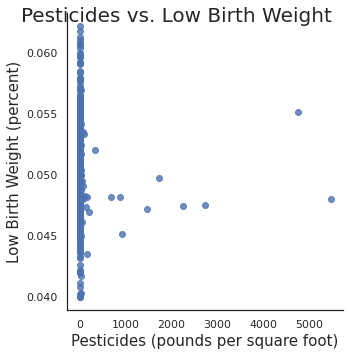

In [8]:
#creating scatterplot for pesticides vs low birth weight
scatterplot1 = sns.lmplot(x='Pesticides', y='Low Birth Weight', 
           data=df_final, fit_reg=False);
#add title 
scatterplot1.fig.suptitle("Pesticides vs. Low Birth Weight",
                  fontsize=20, fontdict={"weight": "bold"})
#change axis title to be more informative
axes = scatterplot1.axes.flatten()
axes[0].set_ylabel("Low Birth Weight (percent)", fontsize =15)
for ax in axes:
    ax.set_xlabel("Pesticides (pounds per square foot)", fontsize = 15)

This scatter plot is showing that we have a few large outliers and a large concentration of observations at almost zero. It seems like there could be a relationship since the data is not dispersed randomly. Ee definitely need to look closer to understand what a potential relationship could be. 

I needed to create another scatterplot so I could visualize the relationship for the other variable of interest, ozone concentration, and low birth weight in each census tract. 

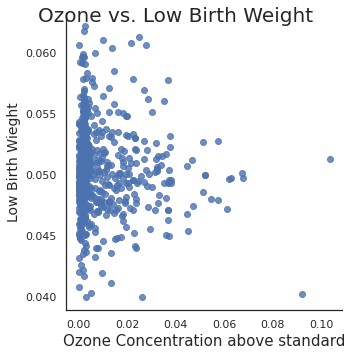

In [9]:
#creating scatterplot for ozone vs low birth weight
scatterplot2 = sns.lmplot(x='Ozone', y='Low Birth Weight', 
           data=df_final, fit_reg=False);
#adding title
scatterplot2.fig.suptitle("Ozone vs. Low Birth Weight",
                  fontsize=20, fontdict={"weight": "bold"})
#fixing axis titles
axes1 = scatterplot2.axes.flatten()
axes1[0].set_ylabel("Low Birth Wieght", fontsize =14)
for ax in axes1:
    ax.set_xlabel("Ozone Concentration above standard", fontsize = 15)

From this scatter there appears to be a potential relationship since there is a bell curve shape but it is not immediately clear what that relationship or correlation could be. As pesticide pounds per square foot increase 

After looking at these two scatterplots it is clear they are not linearly related and there are outliers in both distributions so Pearson's correlation is not appropriate. I decided to use Spearman's correlation since it is less sensitive to outliers and focuses more on similar ranks. Since we are using a correlation analysis I will include the null and alternative hypothesis for each variable. 

Null hypothesis: There is no relationship between pesticide use by pound per square foot and low birth weight.       
Alternate hypothesis: There is a relationship between pesticide use by pound per square foot and low birth weight.

Null hypothesis: There is no relationship between ozone concentration exposure above standard and low birth weight.   
Alternate hypothesis: There is a relationship between ozone concentration exposure above standard and low birth weight.

To present this correlation in both variables, I chose to create a density plot to show how dense some observations were to other and then included the correlation and significance on the plot.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


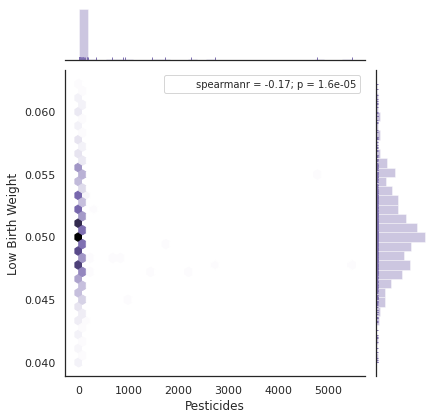

In [15]:
#creating density plot for pesticides and low birth weight
plot2 = sns.jointplot(x=df_final["Pesticides"], y=df_final["Low Birth Weight"], kind='hex',color = 'm',marginal_kws=dict(bins=30, rug=True))
plot2 = plot2.annotate(stats.spearmanr, fontsize= 10)


Based on our correlation value, there seems to be a small negative correlation between pesticides used by pound per square foot and low birth weight. In other words as pesticide use increases the percent of low birth weights in a census tract decreases an vice versa. This correlation is also stastistically significant with a significance value of less than 0.05. For this reason I reject the null hypothesis that there is not a relationship between pesticide use and low birth weight. From the plot we can also see that the most common low birth weight percent was around 0.050 and pesticide pounds per square foot was very close to zero most commonly. The darker the hexagon the more obsevations that overlapped at those values. 

Here is the density plot for the relationship between ozone and low birth weight.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


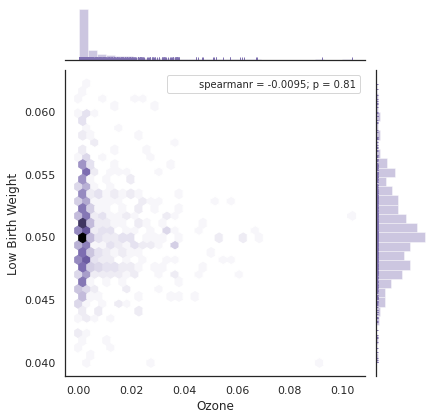

In [16]:
#create density plot with frequency data for ozone and low birth weight
plot1 = sns.jointplot(x=df_final["Ozone"], y=df_final["Low Birth Weight"], kind='hex',color = 'm',marginal_kws=dict(bins=30, rug=True))
plot1 = plot1.annotate(stats.spearmanr, fontsize= 10)


From our correlation value, we see there is a incredibly small negative correlation meaning as ozone concetration increase the percent of low birth weights decreases. However, the result is not statustucally significant with a p value larger than 0.05 this means that we accept the null hypothesis that there is no statistically significant relationship betwen onzone concentration exposure and low birth weight within the census tract of San Diego county. On the plot we see the density is a bit more distributed but still the birth weight percent was most common to be 0.05 percent and the ozone concentration was still close to zero. 

# Ethics & Privacy

The use of the health data set was allowed as it is posted on the CA open data portal and was retrieved by Professor Ellis for my use. As this data was collected and prepared by the state all personal information has been removed and only includes the values for what was being measured and caluclated. Overall the data seems relatively unbiased as another office collects the data for the state enviornmental department. It also did not necessarily require input from the residents in each census tract so there was no missing data due to nonresponse. However since census tracts were used, the census often has non response for a variety of reasons. Because of this the population totals presented in the data sets may not be truly representative of reality. Since census data is still used even with nonnresponse I believe this analysis is still relatively representative of the population in each census tract.    

The use of the park access data set was also allowed since it was posted on the CA open data portal and retrived by Professor Ellis. This data set was collected and prepared by the HCI and as presented had no personal information and any other information that breaches privacy requirements. The HCI is interested in protecting public health and therefore I do not believe there are glaring biases. Again however, the population size data is based on census data which does not always provide an accurate representation so it may not completely represent the population but I believe it does a decent job. 
I do not believe that my findings or work done here with have the potential to be used unethically unless it was attempted to be used as the sole explanation for something as my work here as limited for a variety of reasons. 

# Conclusion & Discussion

For this project, I wanted to explore the effects pesticide use and ozone concentration might have on low birth weight and look at how that effects people close to parks potentially. Using a health data set containing information about ozone concentration and pesticide use and a parks access data set containing information on how many people live within a 1/2 block radius of city parks, I looked for a correlation between ozone concentration and low birth weight as well as pesticide use and low borth weight within Census Tracts in the city of San Diego. Using a spearman's correlation analysis, I found that there is a significant negative correlation between pesticide use and low birth weight which contradicts my hypothesis of a positive correlation between the two. However, there was not a significant correlation between ozone concentration and percentage of low birth weights.                                     
             
From these results, I concluded that from my anaysis ozone does not have the effect that I though and that pesticide use is actually negatively correlated. A potential explanation for this is that many Census Tracts had no pesticide use and this skewed the pesticide data towards 0 since my results differ from what the research suggests. Spearman's correlation is less sensitive to outliers but they can still affect the outcome.   
                                 
A limitation of this work is that it is all kind of an estimate. The ozone concentration and pesticide use was across the entire Census Tract not just within the parks or places near them. So our result can only be roughly generalized to the estimated percent that live wihin 1/2 block of the park. Nevertheless it is still valuable because for the most part more than 95% of population of a tract lived within a park. We also do not hae access to which specific pesticides are used in each area that could affect the data. The Parks Department can still take this data and look at their use of pesticides and the amount of trees and foliage they have, which can help with ozone concentration, to potentially provide health benefits for those near their parks. 